In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns

import xarray as xr
import netCDF4 as nc

Data from: https://data-argo.ifremer.fr/latest_data/

In [2]:
PATH = '~/Downloads/D20200807_prof_0.nc'
ds = xr.open_dataset(PATH)
ds

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 0, N_LEVELS: 1143, N_PARAM: 3, N_PROF: 1000)
Dimensions without coordinates: N_CALIB, N_HISTORY, N_LEVELS, N_PARAM, N_PROF
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE                     (N_PROF) object ...
    PLATFORM_TYPE                 (N_PROF) object ...
    FLOAT_SERIAL_NO               (N_PROF) object ...
    FIRMWARE_VERSION              (N_PROF) object ...
    WMO_INST_TYPE                 (N_PROF) object ...
    JULD                          (N_PROF) datetime64[ns] ...
    JULD_QC                       (N_PROF) object ...
    JULD_LOCATION                 (N_PROF) datetime64[ns] ...
    LATITUDE                      (N_PROF) float64 ...
    LONGITUDE                     (N_PROF) float64 ...
    POSITION_QC                   (N_PROF) object ...
    POSITIONING_SYSTEM            (N_PROF) object ...
    PROFILE_PRES_QC               (N_PROF) object ...
    PROFILE_TEMP_QC               (N_PROF) object ...
    PROFILE_PSAL_QC               (N_PROF) object ...
    VERTICAL_SAMPLING_SCHEME      (N_PROF) object ...
    CONFIG_MISSION_NUMBER         (N_PROF) float64 ...
    PRES                          (N_PROF, N_LEVELS) float32 ...
    PRES_QC                       (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    TEMP                          (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                       (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PSAL                          (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                       (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CALIB, N_PARAM) object ...
    HISTORY_INSTITUTION           (N_HISTORY, N_PROF) object ...
    HISTORY_STEP                  (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE              (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE_RELEASE      (N_HISTORY, N_PROF) object ...
    HISTORY_REFERENCE             (N_HISTORY, N_PROF) object ...
    HISTORY_DATE                  (N_HISTORY, N_PROF) object ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N

In [3]:
variables = [var for var in list(ds.data_vars) if 'HISTORY' not in var]
df = ds[variables].to_dataframe()
df = df.reset_index()
print('Shape: {}'.format(df.shape))
df.head()

Shape: (3429000, 56)


,N_CALIB,N_LEVELS,N_PARAM,N_PROF,DATA_TYPE,FORMAT_VERSION,HANDBOOK_VERSION,REFERENCE_DATE_TIME,DATE_CREATION,DATE_UPDATE,...,PSAL,PSAL_QC,PSAL_ADJUSTED,PSAL_ADJUSTED_QC,PSAL_ADJUSTED_ERROR,PARAMETER,SCIENTIFIC_CALIB_EQUATION,SCIENTIFIC_CALIB_COEFFICIENT,SCIENTIFIC_CALIB_COMMENT,SCIENTIFIC_CALIB_DATE
0,0,0,0,0,b'Argo profile ',b'3.1 ',b'1.2 ',b'19500101000000',b'20200807040114',b'20200808010511',...,36.223999,b'1',36.157001,b'1',0.01,b'PRES ',b'PRES_ADJUSTED = PRES ...,b'None ...,b'SOLO-W floats auto-correct mild pressure dri...,b'20200806000000'
1,0,0,0,1,b'Argo profile ',b'3.1 ',b'1.2 ',b'19500101000000',b'20200807040114',b'20200808010511',...,33.669998,b'1',33.741001,b'1',NaN,b'PRES ',b'PRES_ADJUSTED = PRES ...,b'None ...,b'SOLO-W floats auto-correct mild pressure dri...,b'20200722000000'
2,0,0,0,2,b'Argo profile ',b'3.1 ',b'1.2 ',b'19500101000000',b'20200807040114',b'20200808010511',...,33.680000,b'1',33.750999,b'1',NaN,b'PRES ',b'PRES_ADJUSTED = PRES ...,b'None ...,b'SOLO-W floats auto-correct mild pressure dri...,b'20200722000000'
3,0,0,0,3,b'Argo profile ',b'3.1 ',b'1.2 ',b'19500101000000',b'20200807040114',b'20200808010511',...,33.687000,b'1',33.757999,b'1',NaN,b'PRES ',b'PRES_ADJUSTED = PRES ...,b'None ...,b'SOLO-W floats auto-correct mild pressure dri...,b'20200722000000'
4,0,0,0,4,b'Argo profile ',b'3.1 ',b'1.2 ',b'19500101000000',b'20200807040114',b'20200808010511',...,33.729000,b'1',33.799999,b'1',NaN,b'PRES ',b'PRES_ADJUSTED = PRES ...,b'None ...,b'SOLO-W floats auto-correct mild pressure dri...,b'20200722000000'


In [4]:
# To get rid of those b'...'
# df['DATA_TYPE'] = df['DATA_TYPE'].str.decode('utf-8')

In [5]:
drop_cols = []

for col in df.columns:
    dim = df[col].nunique()
    if dim == 1:
        drop_cols.append(col)

drop_cols

['N_CALIB',
 'DATA_TYPE',
 'FORMAT_VERSION',
 'HANDBOOK_VERSION',
 'REFERENCE_DATE_TIME',
 'DATE_CREATION',
 'DATE_UPDATE',
 'DIRECTION',
 'DATA_STATE_INDICATOR',
 'DATA_MODE',
 'JULD_QC',
 'POSITION_QC',
 'PROFILE_PRES_QC']

In [6]:
df = df.drop(columns=drop_cols)

In [7]:
mask = df['N_PARAM'] == 0
my_df = df[mask]
my_df = my_df[['N_PROF', 'LONGITUDE', 'LATITUDE', 'TEMP', 'PRES']].dropna()
my_df

,N_PROF,LONGITUDE,LATITUDE,TEMP,PRES
0,0,-20.719000,-29.174999,19.808001,10.000000
1,1,-30.795000,-52.013000,2.081000,5.000000
2,2,-30.681999,-52.292999,1.952000,5.000000
3,3,-30.125000,-52.688999,1.724000,5.000000
4,4,-29.134001,-52.874001,1.202000,5.000000
...,...,...,...,...,...
3027447,447,-88.628070,26.154660,4.274000,2009.800049
3027469,469,-89.434780,25.833860,4.288000,2009.839966
3027504,504,-90.650440,24.702500,4.282000,2009.719971
3027562,562,-96.394030,23.665600,4.269000,2009.079956


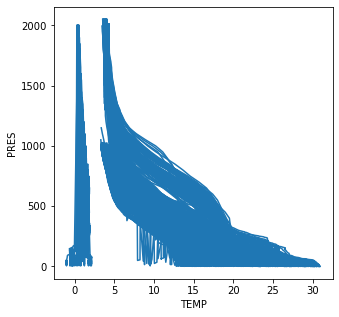

In [8]:
plt.figure(figsize=(5, 5))
sns.lineplot(x='TEMP', y='PRES', units='N_PROF', estimator=None, data=my_df)
plt.show()

<ipython-input-9-70eb7419ad3a>:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  my_map = Basemap(projection='ortho', lon_0=-45, lat_0=0)


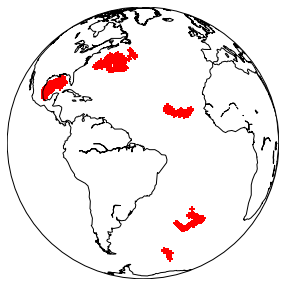

In [9]:
plt.figure(figsize=(5, 5))
my_map = Basemap(projection='ortho', lon_0=-45, lat_0=0)
my_map.drawcoastlines()
x, y = my_map(my_df['LONGITUDE'].to_list(), my_df['LATITUDE'].to_list())
my_map.scatter(x, y, marker='+', color='r')
plt.show()

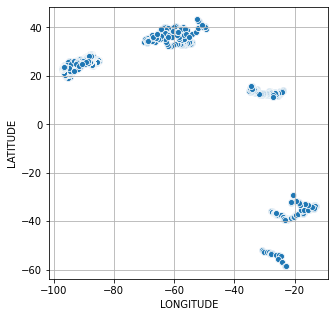

In [14]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', units='N_PROF', estimator=None, data=my_df)
plt.grid()
plt.show()

<ipython-input-16-cbefe8fa12ee>:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  kmeans = KMeans(n_clusters=5, init=centres).fit(X)


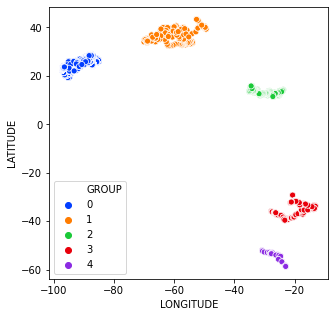

In [16]:
from sklearn.cluster import KMeans

cols = ['LONGITUDE', 'LATITUDE']
centres = np.array([[-90, 25],
           [-60, 35],
           [-30, 15],
           [-20, -35],
           [-25, -55]])
X = my_df[cols]
kmeans = KMeans(n_clusters=5, init=centres).fit(X)
my_df['GROUP'] = kmeans.labels_

plt.figure(figsize=(5, 5))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='GROUP', palette='bright',
                units='N_PROF', estimator=None, data=my_df)
plt.show()

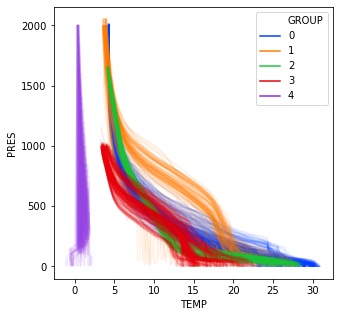

In [20]:
plt.figure(figsize=(5, 5))
sns.lineplot(x='TEMP', y='PRES', hue='GROUP', palette='bright', alpha=.1,
             units='N_PROF', estimator=None, data=my_df)
plt.show()